In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats
import preprocessing.preprocessing as pp
from visualization import mesh_viewer
import networkx as nx
from torch_geometric.utils.convert import from_networkx

# Load two graphs

In [2]:
#nodesFileLeft =  "~/Documents/Intestine/nerve-mask/nodes_nerve_bs2_fh.csv"
#edgesFileLeft = "~/Documents/Intestine/nerve-mask/edges_nerve_bs2_fh.csv"
#
#nodesFileRight =  "~/Documents/Intestine/lymph-mask/nodes_lymph_bs2_fh.csv"
#edgesFileRight = "~/Documents/Intestine/lymph-mask/edges_lymph_bs2_fh.csv"
#
#nodes_left = pd.read_csv(nodesFileLeft, sep = ";", index_col= "id")
#edges_left = pd.read_csv(edgesFileLeft, sep = ";", index_col= "id")
#nodes_right = pd.read_csv(nodesFileRight, sep = ";", index_col= "id")
#edges_right = pd.read_csv(edgesFileRight, sep = ";", index_col= "id")
#
#nodes_left = scale_position(nodes_left, (1.65,1.65,6))
#nodes_right = scale_position(nodes_right, (1.65,1.65,6))
#
#G_left = create_graph(nodes_left, edges_left)
#G_right = create_graph(nodes_right, edges_right)

G05_train = nx.read_gpickle("saved_data/graph_L05_train_gt_pickle")
G05_test = nx.read_gpickle("saved_data/graph_L05_test_gt_pickle")


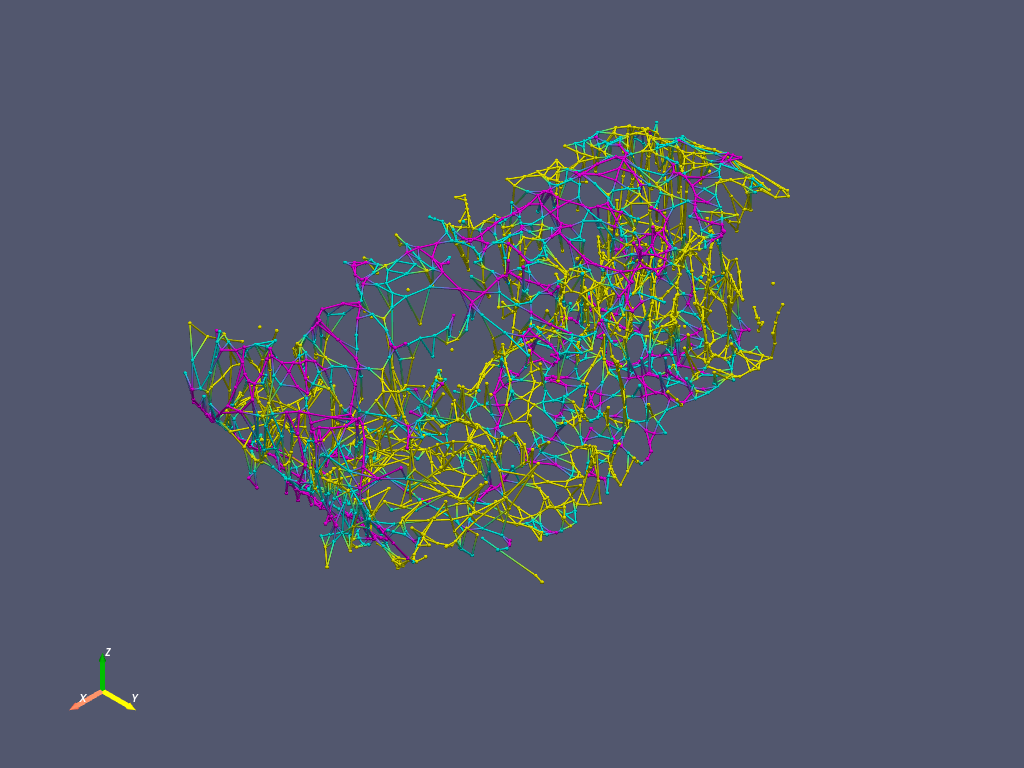

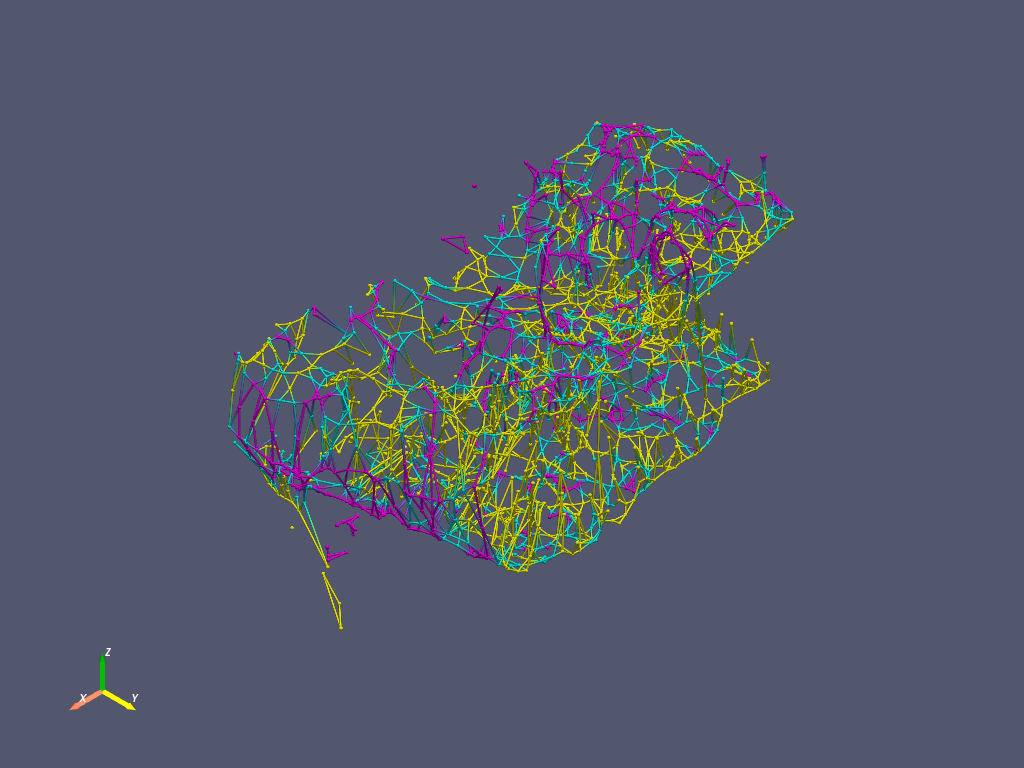

In [3]:
mesh_viewer.renderNXGraph(G05_train, dual = True, vtk = 0, backend = "static")
mesh_viewer.renderNXGraph(G05_test, dual = True, vtk = 0, backend = "static")

# Compare properties of both graphs

### Basic properties

In [4]:
pp.graph_summary(G05_train)
pp.graph_summary(G05_test)

G05_train_torch = from_networkx(G05_train)
G05_test_torch = from_networkx(G05_test)

G05_train_data = G05_train_torch.x.detach().numpy()
G05_test_data = G05_test_torch.x.detach().numpy()


***************
Number of Nodes: 2550
Number of Edges: 4998
Number of Connected Components: 13
Number of Self Loops: 0
Number of Isolated Nodes: 9
Average Node Degree: 3.92
***************
***************
Number of Nodes: 2550
Number of Edges: 4997
Number of Connected Components: 17
Number of Self Loops: 0
Number of Isolated Nodes: 8
Average Node Degree: 3.91921568627451
***************


/home/laurin/.local/lib/python3.8/site-packages/torch_geometric/utils/convert.py:192: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  data[key] = torch.tensor(value)


### Summary statistics for the edges

In [5]:
G05_train_data_pd = pd.DataFrame(G05_train_data)
print(G05_train_data_pd.describe())

                0            1            2             3            4   \
count  2550.000000  2550.000000  2550.000000  2.550000e+03  2550.000000   
mean      0.045915     0.040935     1.101850  1.431747e-05     0.000281   
std       0.036553     0.031362     0.159729  1.507318e-05     0.000153   
min       0.004348     0.004348     1.000000  1.027370e-07     0.000013   
25%       0.021242     0.019835     1.034288  4.163418e-06     0.000173   
50%       0.036670     0.033467     1.062900  9.415830e-06     0.000256   
75%       0.060341     0.053878     1.113103  1.896265e-05     0.000366   
max       0.504723     0.469907     3.683870  1.278460e-04     0.001549   

                5            6            7            8            9   \
count  2550.000000  2550.000000  2550.000000  2550.000000  2550.000000   
mean      0.003163    -0.001800     0.007361    -0.001179     0.012557   
std       0.056337     0.056016     0.056595     0.056058     0.056987   
min      -1.000000    -1.000

In [6]:
G05_test_data_pd = pd.DataFrame(G05_test_data)
print(G05_test_data_pd.describe())

                0            1            2             3            4   \
count  2550.000000  2550.000000  2550.000000  2.550000e+03  2550.000000   
mean      0.046180     0.041212     1.098601  1.489808e-05     0.000291   
std       0.037344     0.031227     0.172631  1.676557e-05     0.000188   
min       0.004348     0.004348     1.000000  9.246320e-08     0.000008   
25%       0.022255     0.020639     1.033033  4.194237e-06     0.000162   
50%       0.037927     0.034892     1.061430  9.554530e-06     0.000261   
75%       0.058549     0.052640     1.110405  1.933512e-05     0.000380   
max       0.520257     0.485255     5.940090  1.626120e-04     0.001875   

                5            6            7            8            9   \
count  2550.000000  2550.000000  2550.000000  2550.000000  2550.000000   
mean      0.003102    -0.001763     0.007389    -0.001044     0.012657   
std       0.056341     0.056019     0.056620     0.056070     0.057054   
min      -1.000000    -1.000

### Comparing the degree distributions

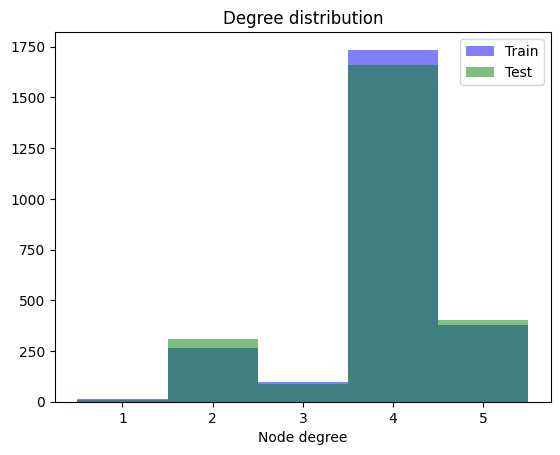

In [7]:
# Look at the average node degree of the different classes 

degree_list_left = np.array([G05_train.degree[val] for val in G05_train.nodes()])
degree_list_right = np.array([G05_test.degree[val] for val in G05_test.nodes()])

fig, ax = plt.subplots()
ax.set_title("Degree distribution")
ax.hist(degree_list_left, bins = np.arange(1,7)-0.5, alpha = 0.5, color = "blue" )
ax.hist(degree_list_right, bins = np.arange(1,7)-0.5, alpha = 0.5, color = "green" )
ax.set_xlabel("Node degree")
ax.legend(("Train", "Test"))
plt.show()

### Compare the the edge features in both graphs

In [8]:
feature_names = ['length', 'distance', 'curveness', 'volume','avgCrossSection', 'minRadiusAvg', 'minRadiusStd', 'avgRadiusAvg', 'avgRadiusStd', 'maxRadiusAvg', 'maxRadiusStd', 'roundnessAvg', 'roundnessStd', 'node1_degree', 'node2_degree', 'num_voxels','hasNodeAtSampleBorder']
feature_dict = dict(zip(np.arange(len(feature_names)), feature_names))

# custom binning, might not show the whole data range
def plot_feature_dist(idx, range, dividor, offset = 0):
    fig, ax = plt.subplots()
    ax.set_title(str(feature_dict[idx]))
    ax.hist(G05_train_data[:,idx],bins = np.arange(0,range)/dividor + offset, alpha = 0.5, color = "blue" )
    ax.hist(G05_test_data[:,idx],bins =  np.arange(0,range)/dividor + offset, alpha = 0.5, color = "green" )
    ax.set_xlabel("Edge " + str(feature_dict[idx]))
    ax.legend(("Left", "Right"))
    plt.show()

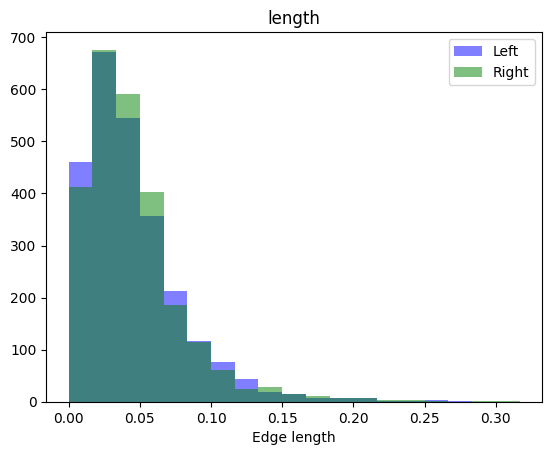

In [9]:
# custom binning, might not show the whole data range
plot_feature_dist(0, 20, 60)

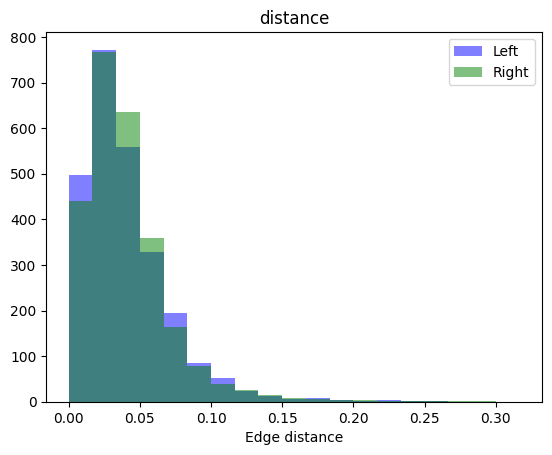

In [10]:
# custom binning, might not show the whole data range
plot_feature_dist(1, 20, 60)

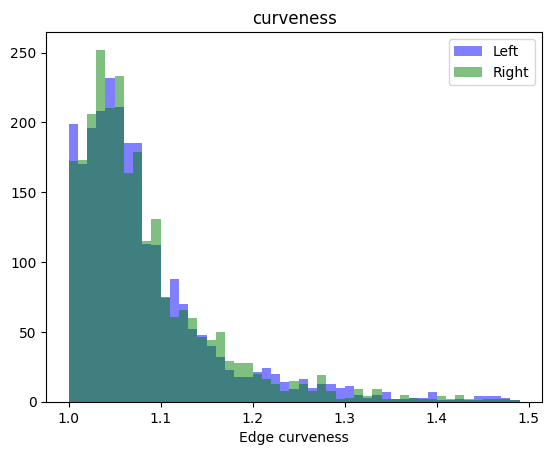

In [11]:
# custom binning, might not show the whole data range
plot_feature_dist(2, 50, 100,1)

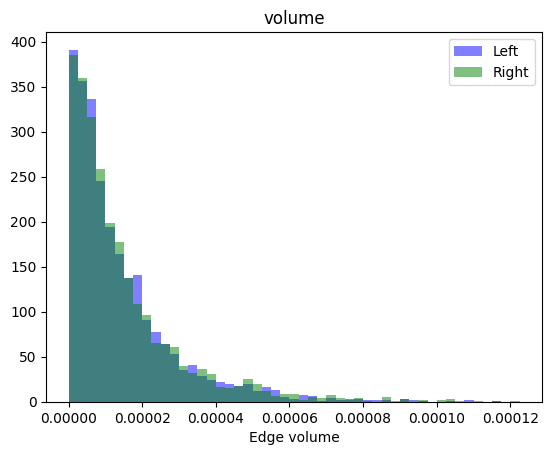

In [12]:
# custom binning, might not show the whole data range
plot_feature_dist(3, 50, 400000)

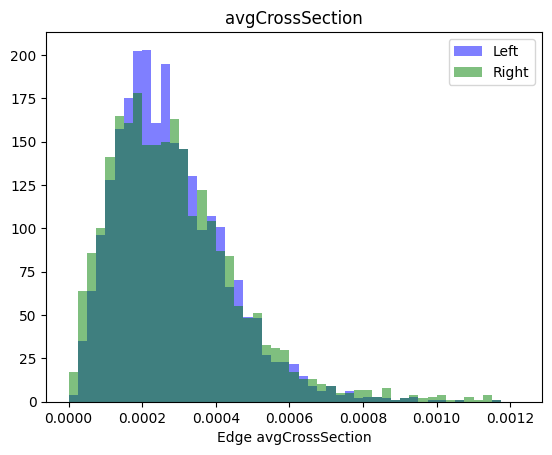

In [13]:
# custom binning, might not show the whole data range
plot_feature_dist(4, 50, 40000)

#### Doing some statistical testing

In [14]:
def t_test_feature(idx):
    t_stat, p_val = stats.ttest_ind(G05_train_data[:,idx], G05_test_data[:,idx])
    print("*************")
    print(f"{feature_dict[idx]} p-value: {p_val}")



Obviously take with a grain of salt. No test on preconditions, and from pure optical checking these are definitely violated in some cases (e.g. volume: half sided distribution)

In [15]:
t_test_feature(0)
# no significant diff

t_test_feature(1)
# no significant diff

t_test_feature(2)
# no significant diff

t_test_feature(3)
# no significant diff

t_test_feature(4)
# no significant diff

*************
length p-value: 0.7976080981713559
*************
distance p-value: 0.7520330948732992
*************
curveness p-value: 0.48552509994463344
*************
volume p-value: 0.1934966517520582
*************
avgCrossSection p-value: 0.04647029473076011


# Now make comparisons just for specific classes:

#### Are the different classes in a comparable ratio?

[ 739 1276  535]
[ 712 1272  566]


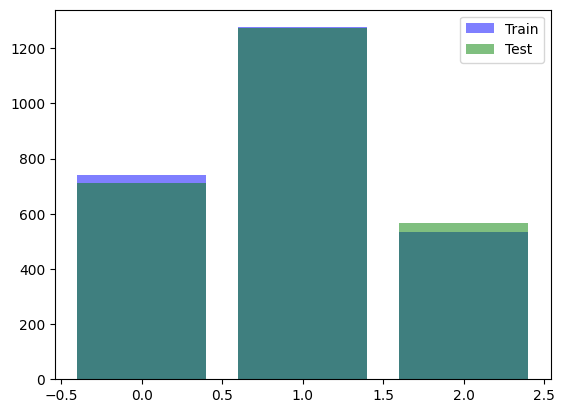

In [16]:
y__train = G05_train_torch.y.detach().numpy()
y__test = G05_test_torch.y.detach().numpy()
cls_train, cls_count_train = np.unique(y__train, return_counts= True)
cls_test, cls_count_test = np.unique(y__test, return_counts= True)
print(cls_count_train)
print(cls_count_test)

fig, ax = plt.subplots()
ax.bar(cls_train,cls_count_train, alpha = 0.5, color = "blue" )
ax.bar(cls_test,cls_count_test, alpha = 0.5, color = "green" )
ax.legend(("Train", "Test"))
plt.show()

In [17]:
def plot_feature_dist_cls(idx, range, dividor, offset = 0, cls = 0):
    y__train = G05_train_torch.y.detach().numpy()
    y__test = G05_test_torch.y.detach().numpy()
    fig, ax = plt.subplots()
    ax.set_title(str(feature_dict[idx]) + " class: " +str(cls))
    ax.hist(G05_train_data[y__train == cls,:][:,idx],bins = np.arange(0,range)/dividor + offset, alpha = 0.5, color = "blue" )
    ax.hist(G05_test_data[y__train == cls,:][:,idx],bins =  np.arange(0,range)/dividor + offset, alpha = 0.5, color = "green" )
    ax.set_xlabel("Edge " + str(feature_dict[idx]))
    ax.legend(("Train", "Test"))
    plt.show()

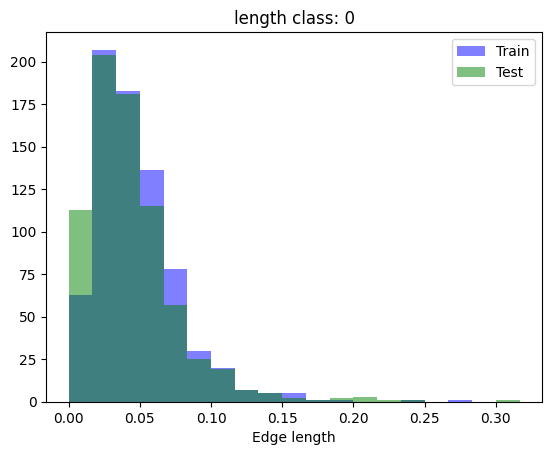

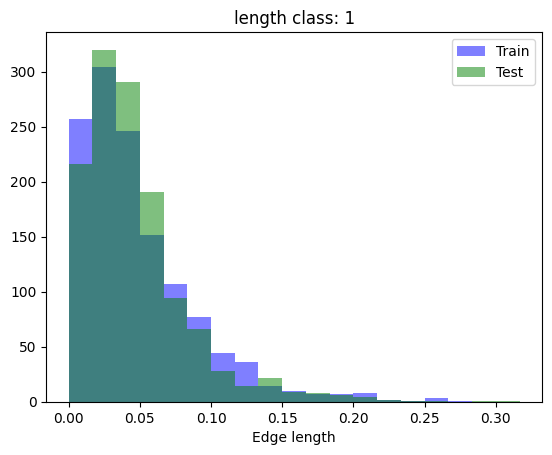

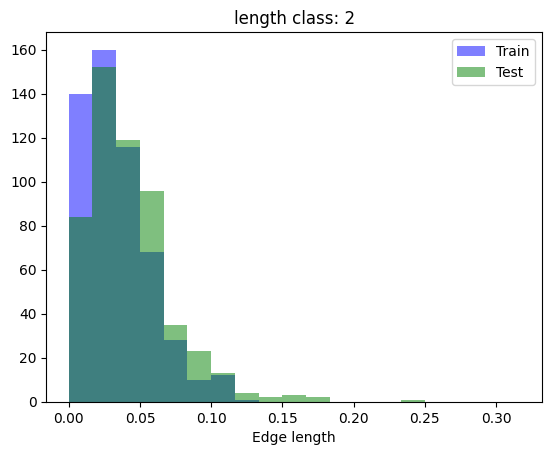

In [18]:
plot_feature_dist_cls(0, 20, 60, cls = 0)
plot_feature_dist_cls(0, 20, 60, cls = 1)
plot_feature_dist_cls(0, 20, 60, cls = 2)

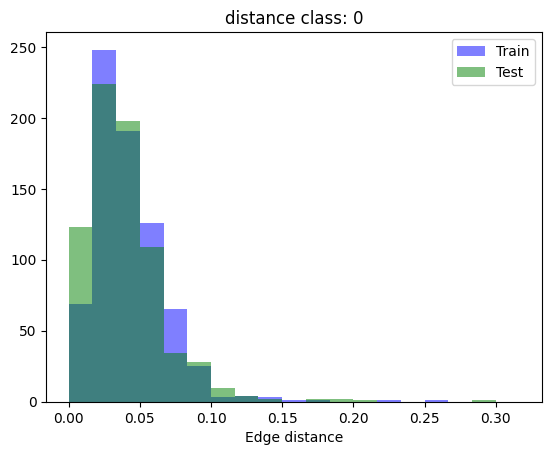

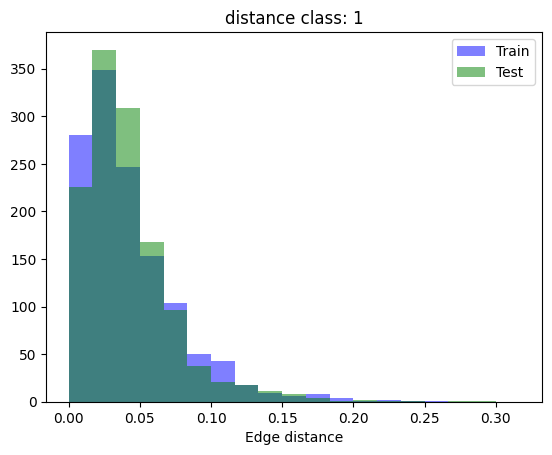

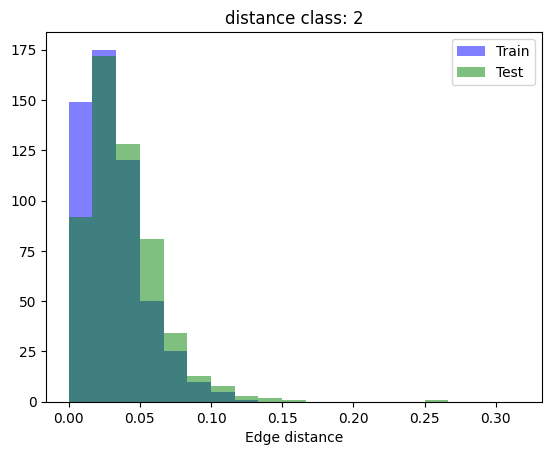

In [19]:
plot_feature_dist_cls(1, 20, 60, cls = 0)
plot_feature_dist_cls(1, 20, 60, cls = 1)
plot_feature_dist_cls(1, 20, 60, cls = 2)

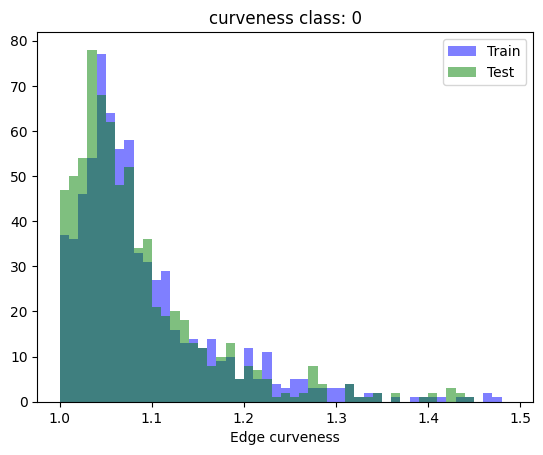

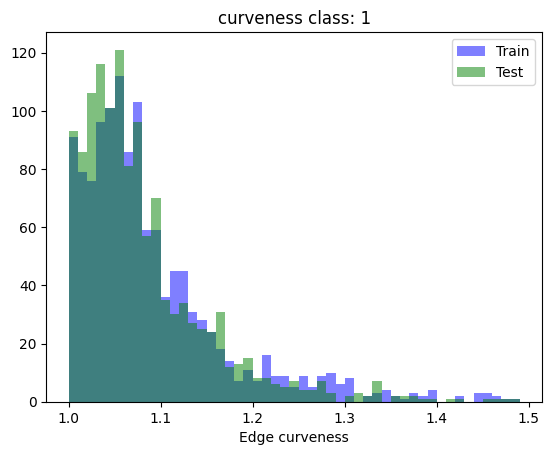

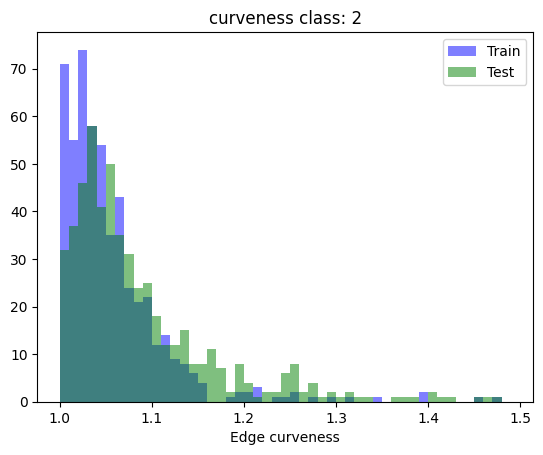

In [20]:
plot_feature_dist_cls(2, 50, 100, offset = 1, cls = 0)
plot_feature_dist_cls(2, 50, 100, offset = 1, cls = 1)
plot_feature_dist_cls(2, 50, 100, offset = 1, cls = 2)

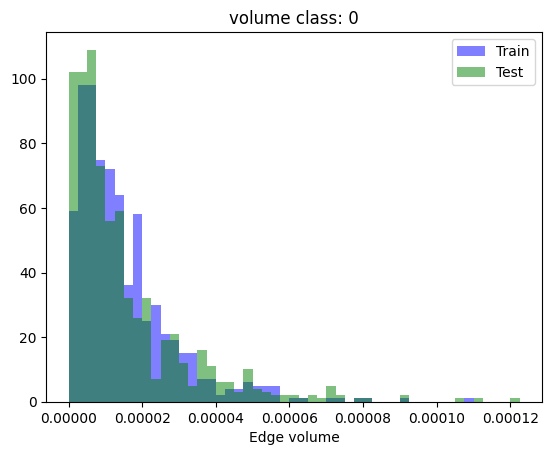

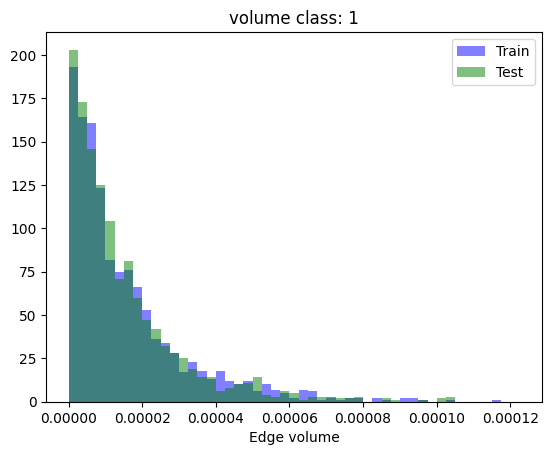

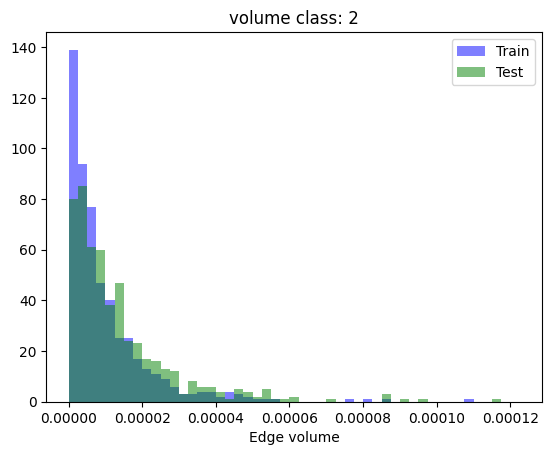

In [21]:
plot_feature_dist_cls(3, 50, 400000, cls = 0)
plot_feature_dist_cls(3, 50, 400000, cls = 1)
plot_feature_dist_cls(3, 50, 400000, cls = 2)

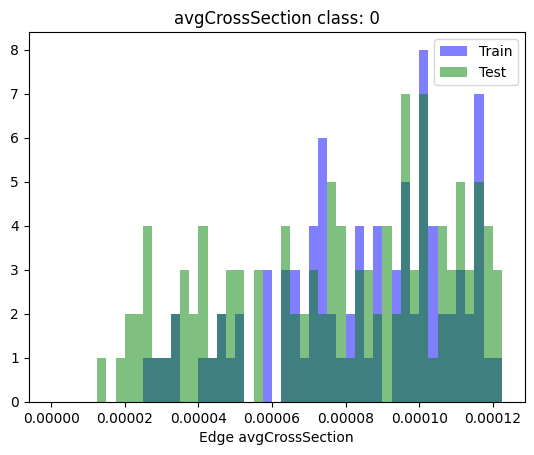

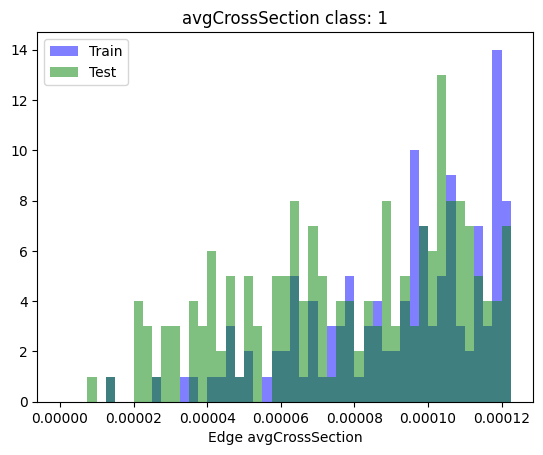

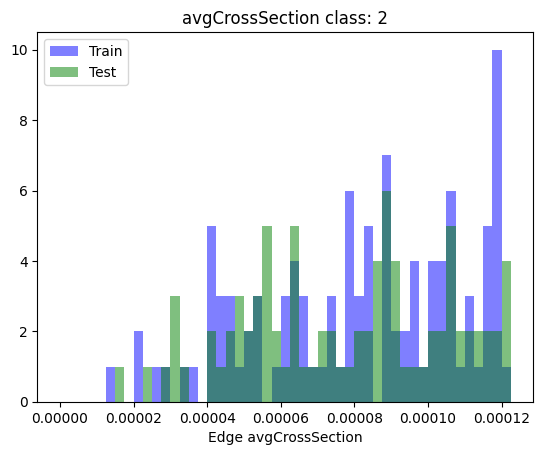

In [22]:
plot_feature_dist_cls(4, 50, 400000, cls = 0)
plot_feature_dist_cls(4, 50, 400000, cls = 1)
plot_feature_dist_cls(4, 50, 400000, cls = 2)

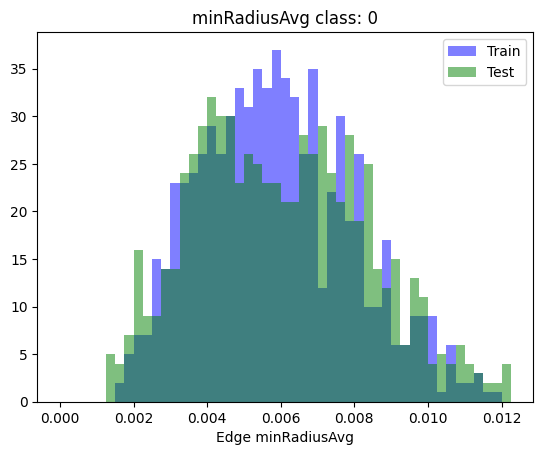

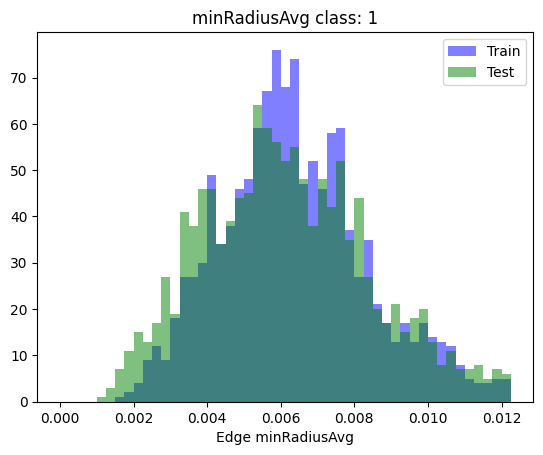

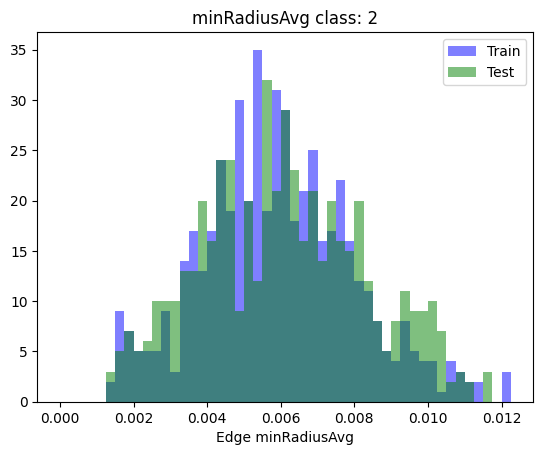

In [23]:
plot_feature_dist_cls(5, 50, 4000, cls = 0)
plot_feature_dist_cls(5, 50, 4000, cls = 1)
plot_feature_dist_cls(5, 50, 4000, cls = 2)

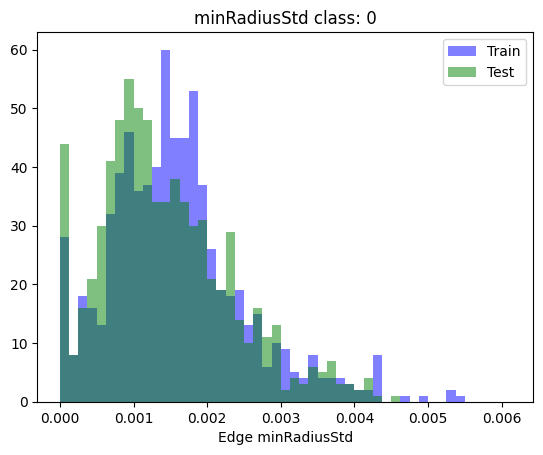

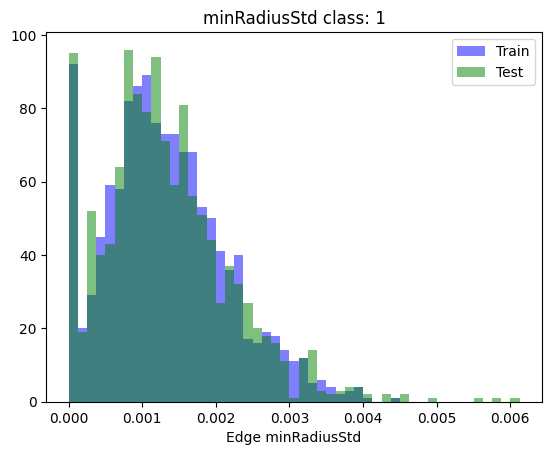

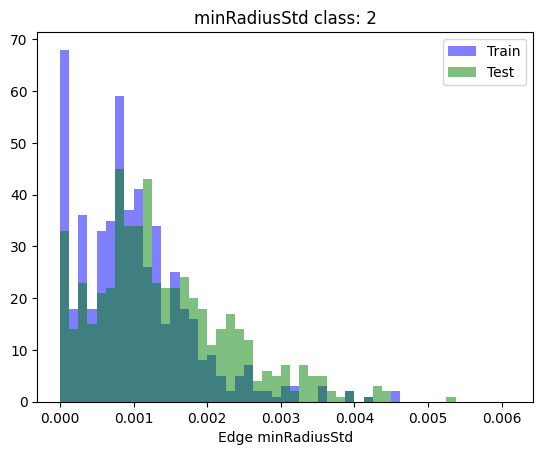

In [24]:
plot_feature_dist_cls(6, 50, 8000, cls = 0)
plot_feature_dist_cls(6, 50, 8000, cls = 1)
plot_feature_dist_cls(6, 50, 8000, cls = 2)

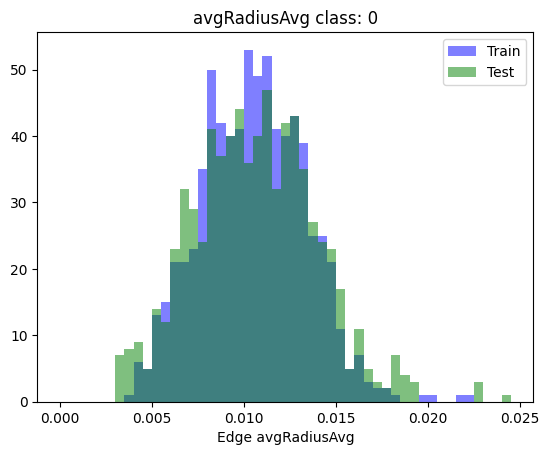

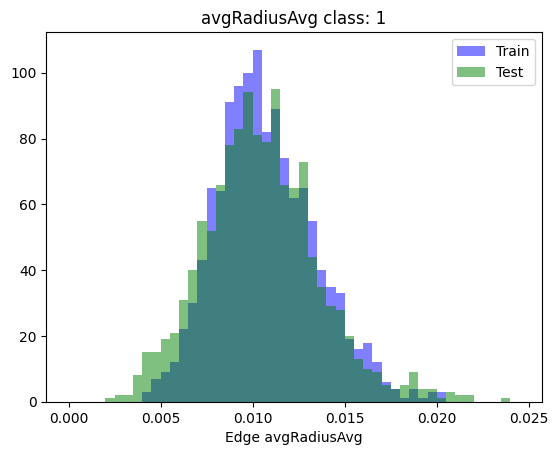

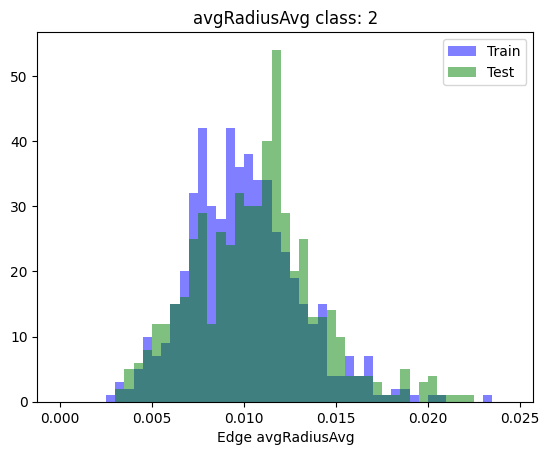

In [25]:
plot_feature_dist_cls(7, 50, 2000, cls = 0)
plot_feature_dist_cls(7, 50, 2000, cls = 1)
plot_feature_dist_cls(7, 50, 2000, cls = 2)

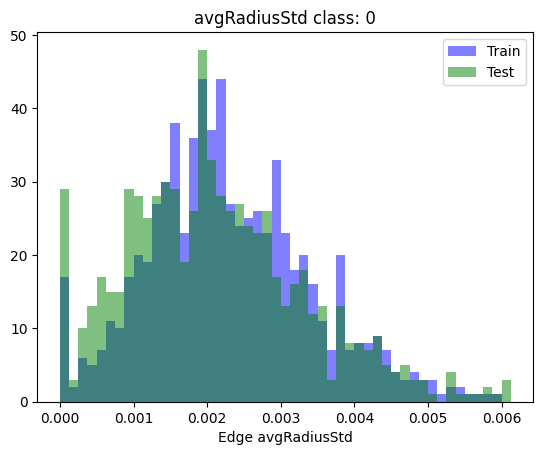

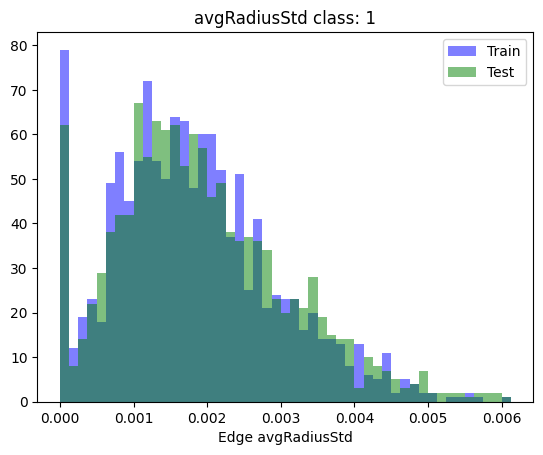

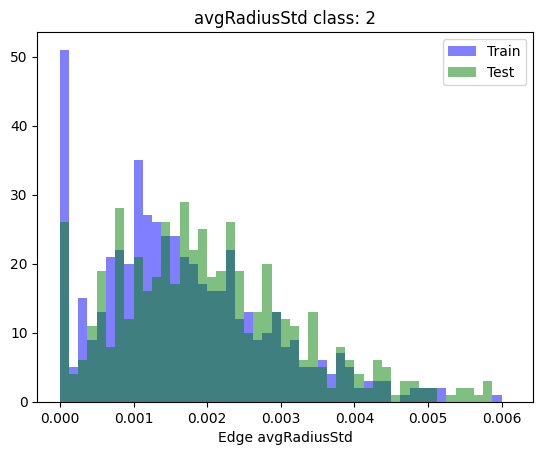

In [26]:
plot_feature_dist_cls(8, 50, 8000, cls = 0)
plot_feature_dist_cls(8, 50, 8000, cls = 1)
plot_feature_dist_cls(8, 50, 8000, cls = 2)

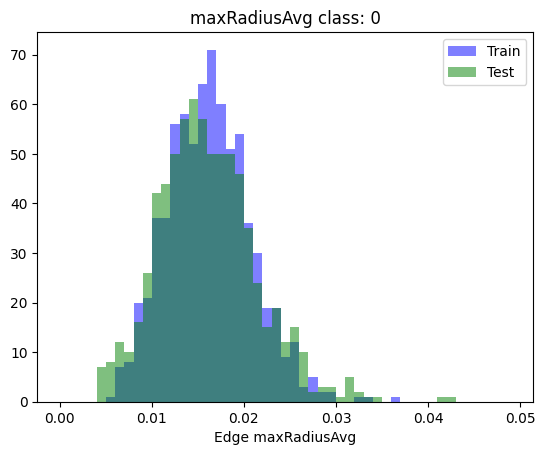

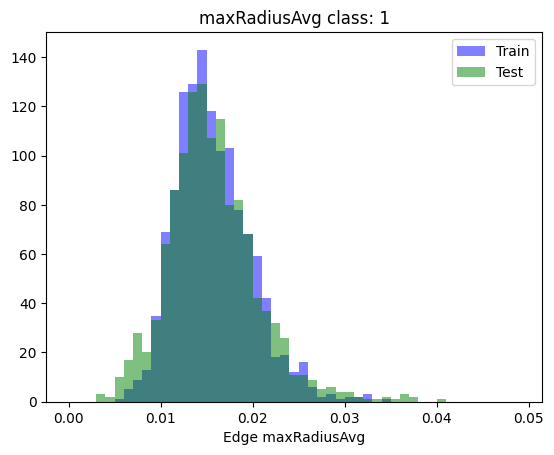

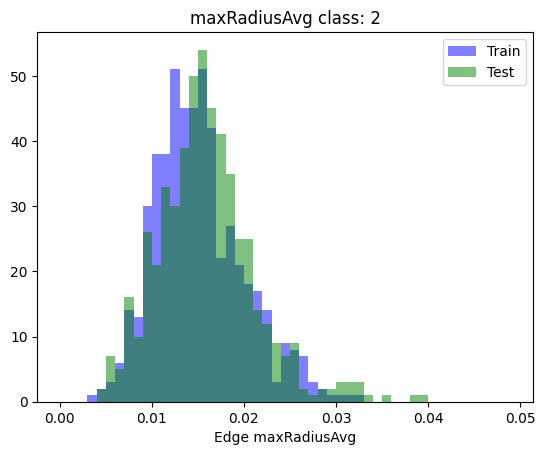

In [27]:
plot_feature_dist_cls(9, 50, 1000, cls = 0)
plot_feature_dist_cls(9, 50, 1000, cls = 1)
plot_feature_dist_cls(9, 50, 1000, cls = 2)

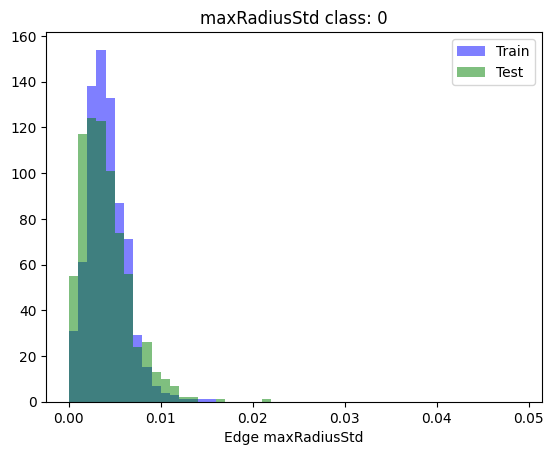

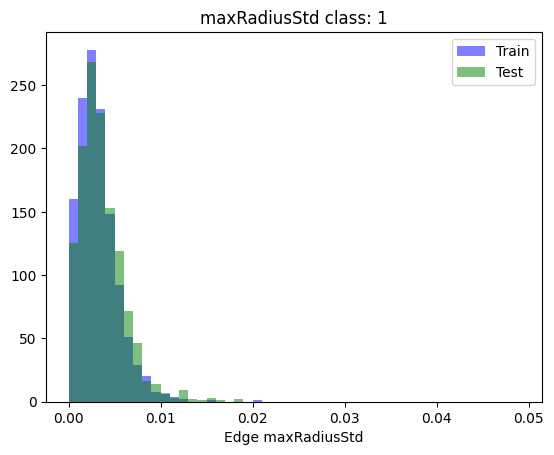

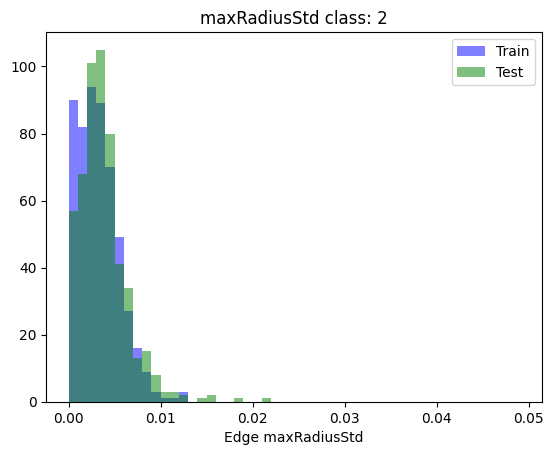

In [28]:
plot_feature_dist_cls(10, 50, 1000, cls = 0)
plot_feature_dist_cls(10, 50, 1000, cls = 1)
plot_feature_dist_cls(10, 50, 1000, cls = 2)

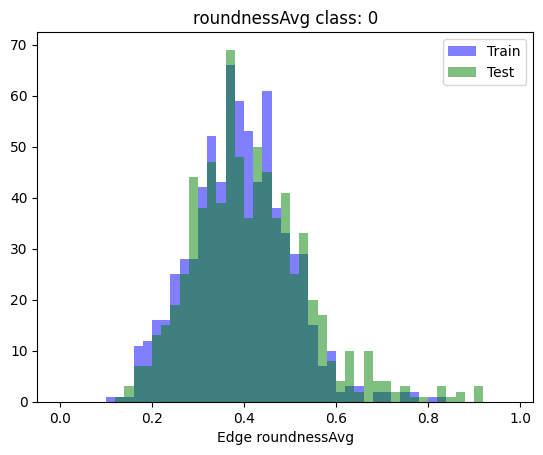

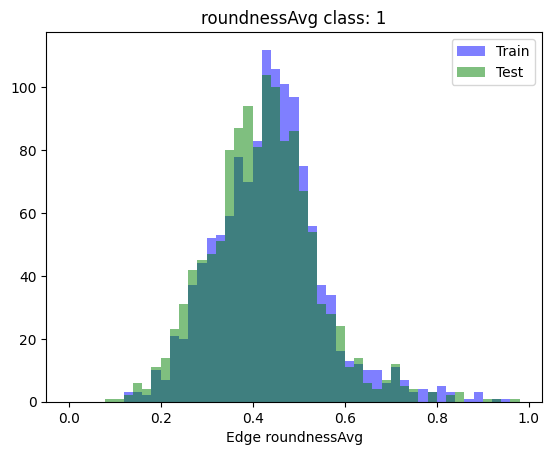

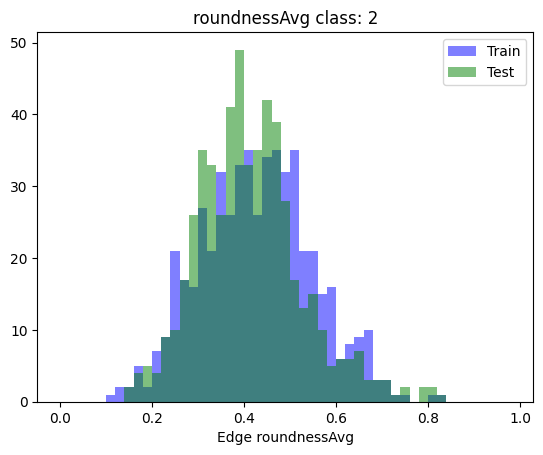

In [29]:
plot_feature_dist_cls(11, 50, 50, cls = 0)
plot_feature_dist_cls(11, 50, 50, cls = 1)
plot_feature_dist_cls(11, 50, 50, cls = 2)

# Compare the properties of the nodes with different classes

In [30]:
# x data 
G05_train_data = G05_train_torch.x.detach().numpy()
G05_test_data = G05_test_torch.x.detach().numpy()
# y data
G05_train_lab = G05_train_torch.y.detach().numpy()
G05_test_lab = G05_test_torch.y.detach().numpy()

data_x = np.concatenate((G05_train_data , G05_test_data))
data_y = np.concatenate((G05_train_lab ,G05_test_lab))

print(data_x.shape)
print(data_y.shape)

(5100, 17)
(5100,)


In [31]:
def plot_feature_dist(idx, span, dividor, offset = 0):
    unique_idx = len(np.unique(data_y))
    fig, ax = plt.subplots()
    ax.set_title(str(feature_dict[idx]))
    bins_comb =np.histogram(data_x[:,idx], bins=40)[1] #get the bin edges
    for act_cls in range(unique_idx):
        ax.hist(data_x[data_y == act_cls,:][:,idx],bins = bins_comb, alpha = 0.3)
        #ax.hist(data_x[data_y == act_cls,:][:,idx],bins = np.arange(0,span)/dividor + offset, alpha = 0.2)
    ax.set_xlabel("Edge " + str(feature_dict[idx]))
    #ax.legend(("Train", "Test"))
    plt.show()

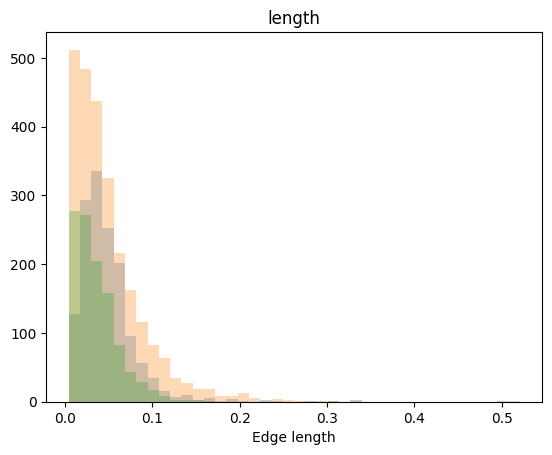

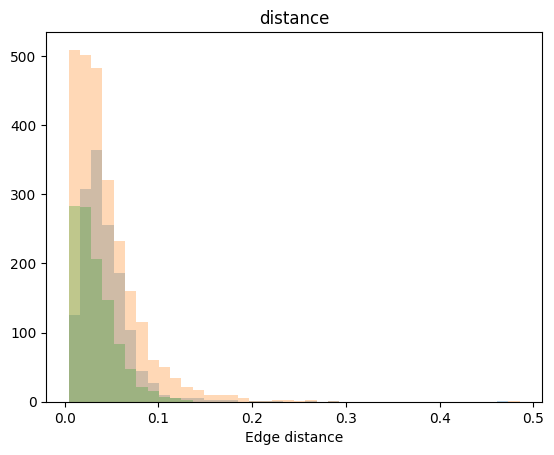

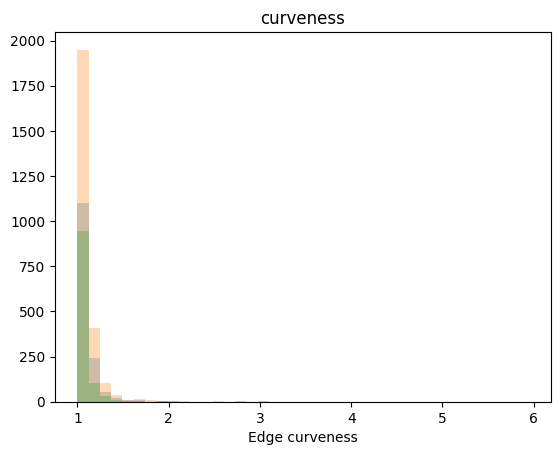

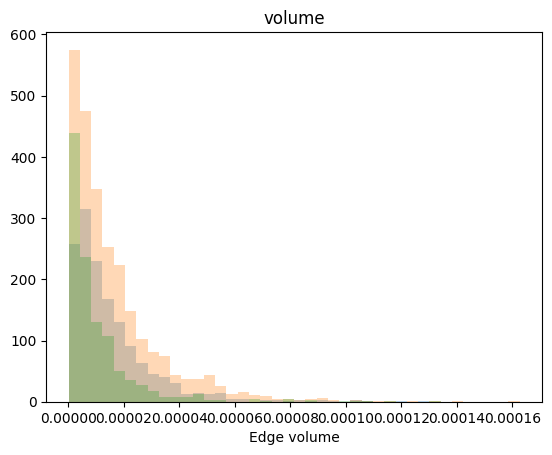

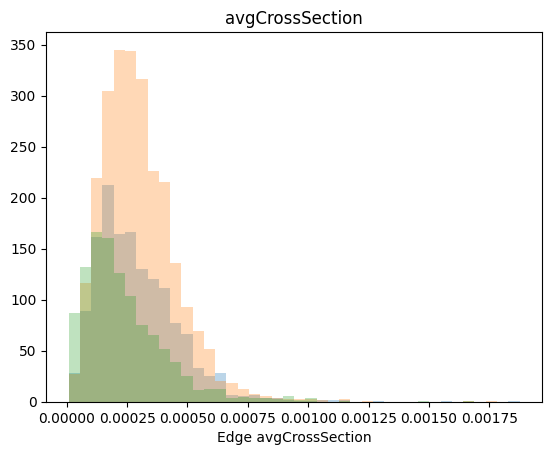

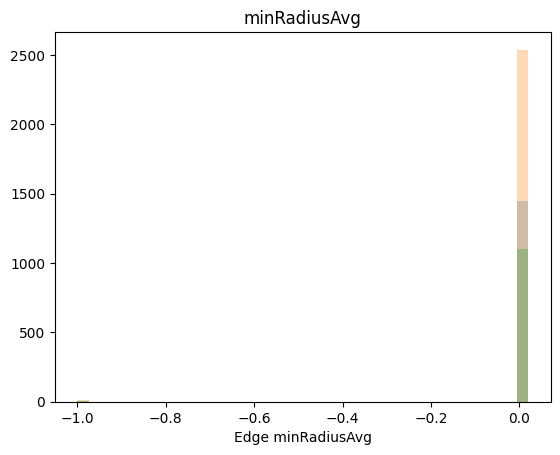

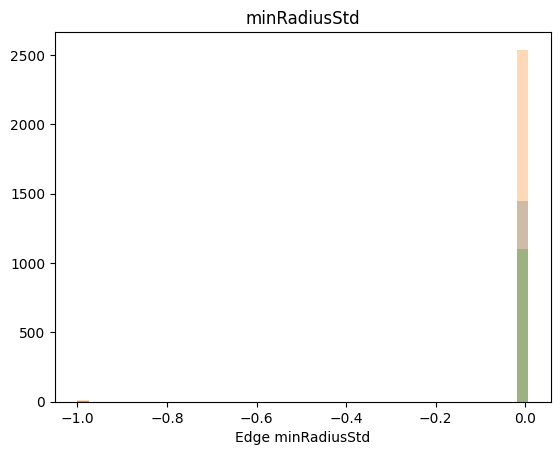

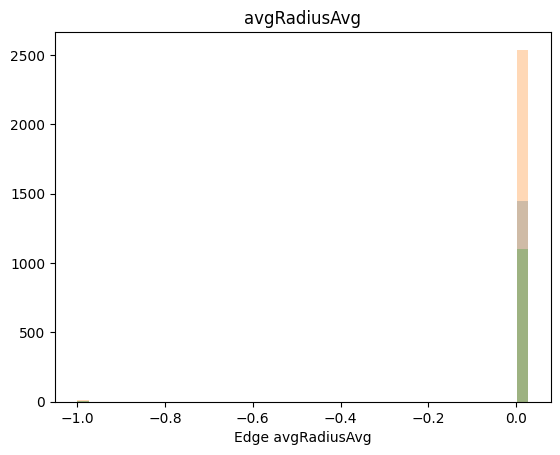

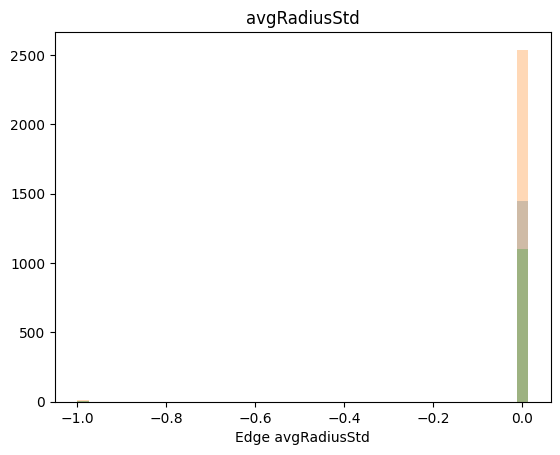

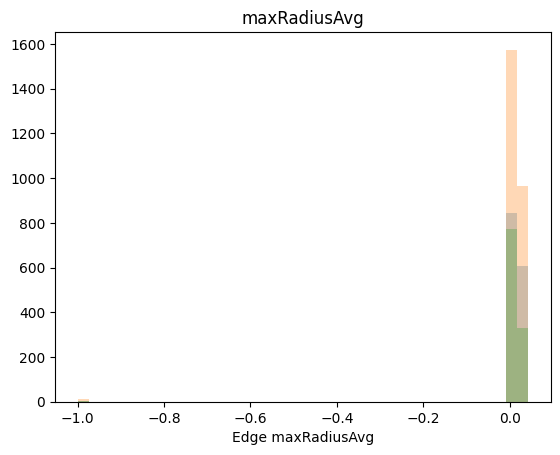

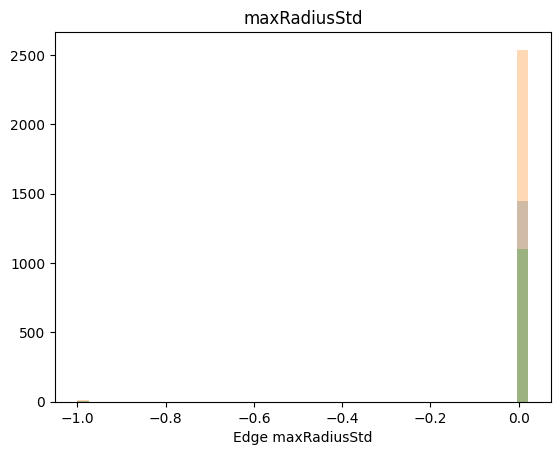

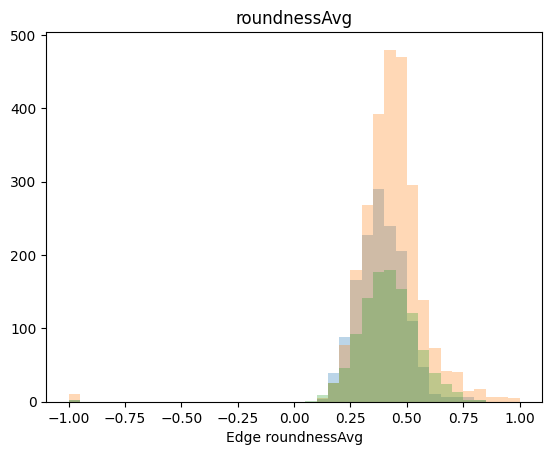

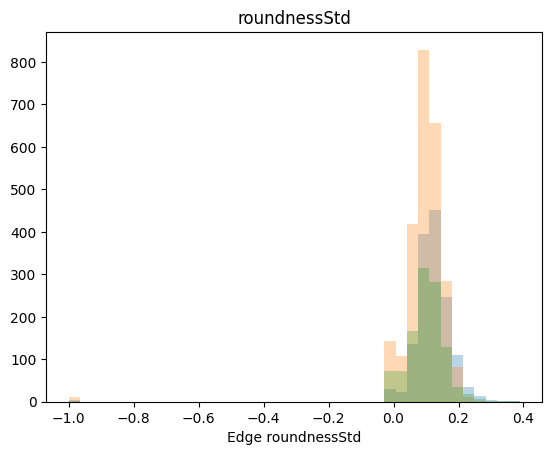

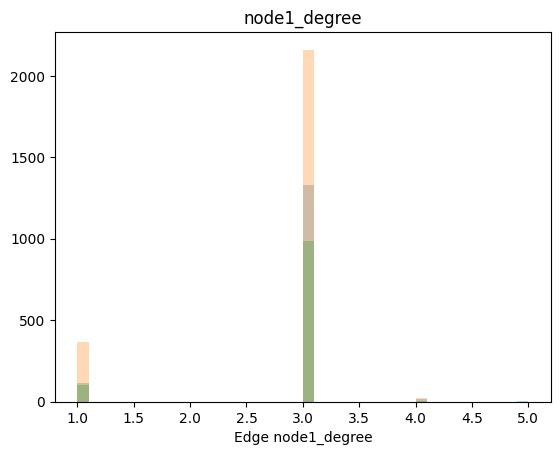

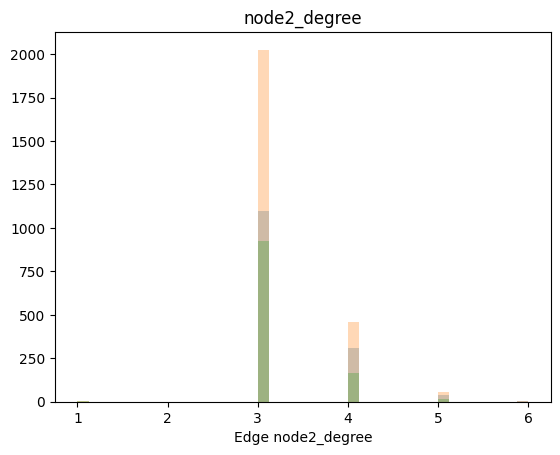

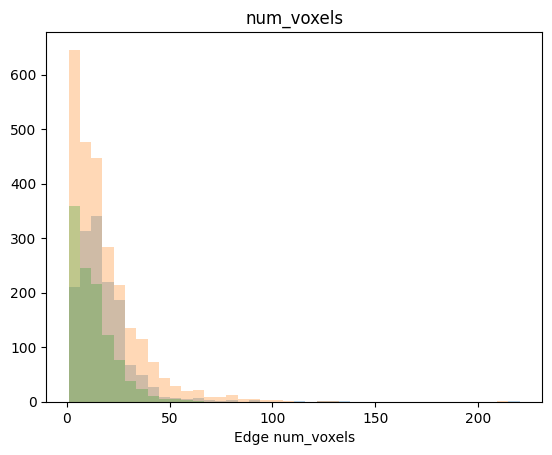

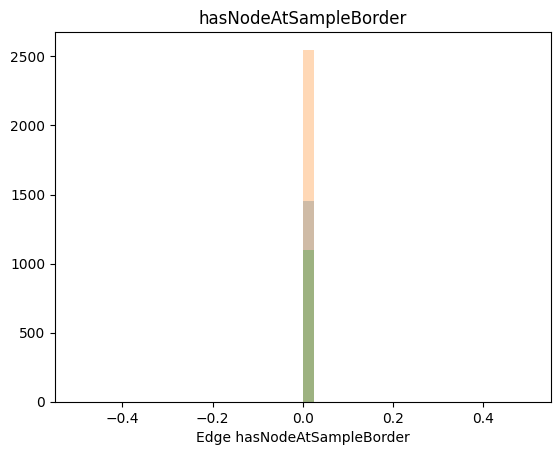

In [33]:
for i in range(17):
    plot_feature_dist(i,100,500)

